In [1]:
# Discretization

import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer

In [57]:
data = pd.read_csv('/Users/mattmastin/Desktop/titanic.csv',
                  usecols=['age', 'fare', 'survived'])
data.head()

,survived,age,fare
0,1,29.0000,211.3375
1,1,0.9167,151.5500
2,0,2.0000,151.5500
3,0,30.0000,151.5500
4,0,25.0000,151.5500


In [58]:
X_train, X_test, y_train, y_test = train_test_split(data[['age', 'fare']],
                                                   data['survived'],
                                                   test_size=0.3,
                                                   random_state=0)

X_train.shape, X_test.shape

((916, 2), (393, 2))

In [6]:
def impute_na(data, variable):
    df = data.copy()
    df[variable +'_random'] = df[variable]
    
    random_sample = X_train[variable].dropna().sample(
        df[variable].isnull().sum(), random_state=0)
    
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample
    
    return df[variable + '_random']

In [32]:
X_train['age'] = impute_na(data, 'age')
X_test['age'] = impute_na(data, 'age')

X_train['fare'] = impute_na(data, 'fare')
X_test['fare'] = impute_na(data, 'fare')

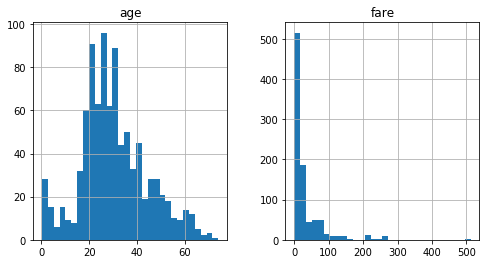

In [9]:
X_train[['age', 'fare']].hist(bins=30, figsize=(8,4))
plt.show()

In [11]:
data.head()

,survived,age,fare
0,1,29.0000,211.3375
1,1,0.9167,151.5500
2,0,2.0000,151.5500
3,0,30.0000,151.5500
4,0,25.0000,151.5500


In [15]:
X_train.shape, X_test.shape

((916, 2), (393, 2))

In [59]:
X_train['age'] = impute_na(data, 'age')
X_test['age'] = impute_na(data, 'age')

X_train['fare'] = impute_na(data, 'fare')
X_test['fare'] = impute_na(data, 'fare')

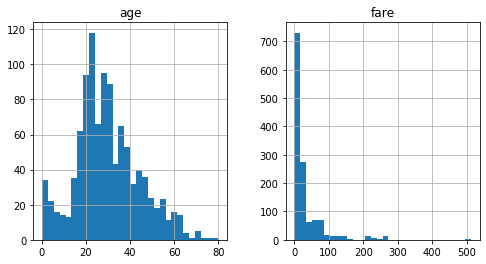

In [17]:
data[['age', 'fare']].hist(bins=30, figsize=(8,4))
plt.show()

In [18]:
age_range = X_train['age'].max() - X_train['age'].min()
age_range

73.8333

In [20]:
age_range / 10

7.383329999999999

In [21]:
min_value = int(np.floor(X_train['age'].min()))
max_value = int(np.ceil(X_train['age'].max()))

# round the bin width
inter_value = int(np.round(age_range / 10))

min_value, max_value, inter_value

(0, 74, 7)

In [22]:
intervals = [i for i in range(min_value, max_value + inter_value, inter_value)]
intervals

[0, 7, 14, 21, 28, 35, 42, 49, 56, 63, 70, 77]

In [23]:
labels = ['Bin_' + str(i) for i in range(1, len(intervals))]

In [24]:
labels

['Bin_1',
 'Bin_2',
 'Bin_3',
 'Bin_4',
 'Bin_5',
 'Bin_6',
 'Bin_7',
 'Bin_8',
 'Bin_9',
 'Bin_10',
 'Bin_11']

In [25]:
# create binned age / discretize

X_train['age_disc_labels'] = pd.cut(x=X_train['age'],
                                   bins=intervals,
                                   labels=labels,
                                   include_lowest=True)

X_train['age_disc'] = pd.cut(x=X_train['age'],
                            bins=intervals,
                            include_lowest=True)

X_train.head()

,age,fare,age_disc_labels,age_disc
501,13.0,19.5000,Bin_2,"(7.0, 14.0]"
588,4.0,23.0000,Bin_1,"(-0.001, 7.0]"
402,30.0,13.8583,Bin_5,"(28.0, 35.0]"
1193,21.0,7.7250,Bin_3,"(14.0, 21.0]"
686,22.0,7.7250,Bin_4,"(21.0, 28.0]"


In [26]:
X_train.groupby('age_disc')['age'].count()

age_disc
(-0.001, 7.0]     48
(7.0, 14.0]       31
(14.0, 21.0]     155
(21.0, 28.0]     230
(28.0, 35.0]     176
(35.0, 42.0]     105
(42.0, 49.0]      75
(49.0, 56.0]      51
(56.0, 63.0]      32
(63.0, 70.0]      10
(70.0, 77.0]       3
Name: age, dtype: int64

Text(0, 0.5, 'num observations per bin')

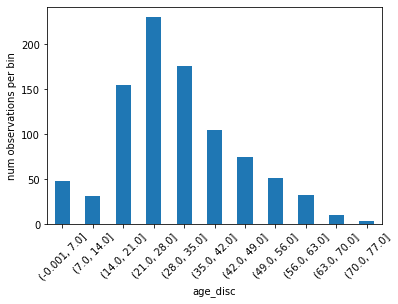

In [27]:
X_train.groupby('age_disc')['age'].count().plot.bar()
plt.xticks(rotation=45)
plt.ylabel('num observations per bin')

In [28]:
X_test['age_disc_labels'] = pd.cut(x=X_test['age'],
                                  bins=intervals,
                                  labels=labels,
                                  include_lowest=True)

X_test['age_disc'] = pd.cut(x=X_test['age'],
                           bins=intervals,
                           include_lowest=True)

X_test.head()

,age,fare,age_disc_labels,age_disc
1139,38.0,7.8958,Bin_6,"(35.0, 42.0]"
533,21.0,21.0000,Bin_3,"(14.0, 21.0]"
459,42.0,27.0000,Bin_6,"(35.0, 42.0]"
1150,34.0,14.5000,Bin_5,"(28.0, 35.0]"
393,25.0,31.5000,Bin_4,"(21.0, 28.0]"


Text(0, 0.5, 'num of obs per bin')

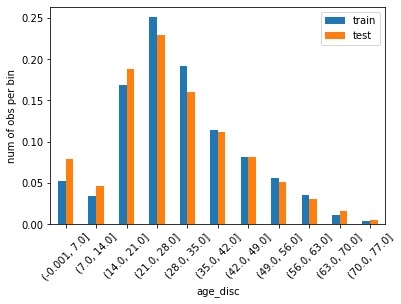

In [29]:
# see if train and test distributions are similar

t1 = X_train.groupby(['age_disc'])['age'].count() / len(X_train)
t2 = X_test.groupby(['age_disc'])['age'].count() / len(X_test)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns= ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('num of obs per bin')

In [34]:
# same with scikitlearn

disc = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')

disc.fit(X_train[['age', 'fare']])

KBinsDiscretizer(encode='ordinal', n_bins=10, strategy='uniform')

In [35]:
disc.fit(X_train[['age', 'fare']])

KBinsDiscretizer(encode='ordinal', n_bins=10, strategy='uniform')

In [36]:
disc.bin_edges_

array([array([ 0.1667 ,  7.55003, 14.93336, 22.31669, 29.70002, 37.08335,
       44.46668, 51.85001, 59.23334, 66.61667, 74.     ]),
       array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
       307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ])],
      dtype=object)

In [37]:
train_t = disc.transform(X_train[['age', 'fare']])
train_t = pd.DataFrame(train_t, columns=['age', 'fare'])

train_t.head()

,age,fare
0,1.0,0.0
1,0.0,0.0
2,4.0,0.0
3,2.0,0.0
4,2.0,0.0


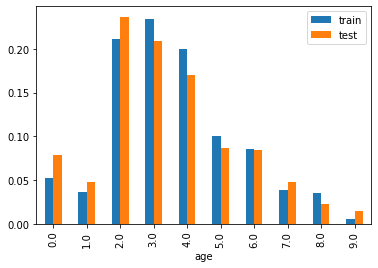

In [39]:
test_t = disc.transform(X_test[['age', 'fare']])
test_t = pd.DataFrame(test_t, columns=['age', 'fare'])

t1 = train_t.groupby(['age'])['age'].count() / len(train_t)
t2 = test_t.groupby(['age'])['age'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()

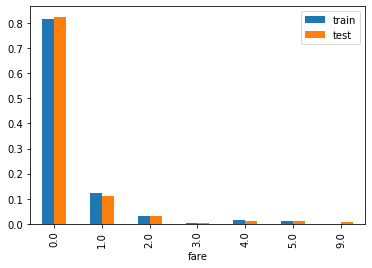

In [40]:
t1 = train_t.groupby(['fare'])['fare'].count() / len(train_t)
t2 = test_t.groupby(['fare'])['fare'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns= ['train', 'test']
tmp.plot.bar()

In [41]:
# equal frequency discretization

X_train['age'] = impute_na(data, 'age')
X_test['age'] = impute_na(data, 'age')

X_train['fare'] = impute_na(data, 'fare')
X_test['fare'] = impute_na(data, 'fare')

In [42]:
age_discreted, intervals = pd.qcut(
    X_train['age'], 10, labels=None, retbins=True, precision=3,duplicates='raise')

pd.concat([age_discreted, X_train['age']], axis=1).head()

,age,age
501,"(0.166, 16.0]",13.0
588,"(0.166, 16.0]",4.0
402,"(28.5, 32.0]",30.0
1193,"(50.0, 74.0]",71.0
686,"(20.0, 23.0]",22.0


In [43]:
intervals

array([ 0.1667, 16.    , 20.    , 23.    , 26.    , 28.5   , 32.    ,
       36.    , 42.    , 50.    , 74.    ])

In [45]:
age_discreted.value_counts()

(28.5, 32.0]     114
(23.0, 26.0]     103
(0.166, 16.0]    100
(20.0, 23.0]      94
(16.0, 20.0]      92
(36.0, 42.0]      90
(42.0, 50.0]      89
(32.0, 36.0]      82
(50.0, 74.0]      81
(26.0, 28.5]      71
Name: age, dtype: int64

In [46]:
labels = ['Q'+str(i) for i in range(1, 11)]
labels

['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']

In [47]:
age_discreted, intervals = pd.qcut(X_train['age'] , 10, labels=labels,
                                  retbins=True,
                                  precision=3, duplicates='raise')

age_discreted.head()

501      Q1
588      Q1
402      Q6
1193    Q10
686      Q3
Name: age, dtype: category
Categories (10, object): [Q1 < Q2 < Q3 < Q4 ... Q7 < Q8 < Q9 < Q10]

In [48]:
X_test['age_disc_label'] = pd.cut(x=X_test['age'], bins=intervals, labels=labels)
X_test['age_disc'] = pd.cut(x=X_test['age'], bins=intervals)

X_test.head()

,age,fare,age_disc_label,age_disc
1139,38.0,7.8958,Q8,"(36.0, 42.0]"
533,21.0,21.0000,Q3,"(20.0, 23.0]"
459,42.0,27.0000,Q8,"(36.0, 42.0]"
1150,34.0,14.5000,Q7,"(32.0, 36.0]"
393,25.0,31.5000,Q4,"(23.0, 26.0]"


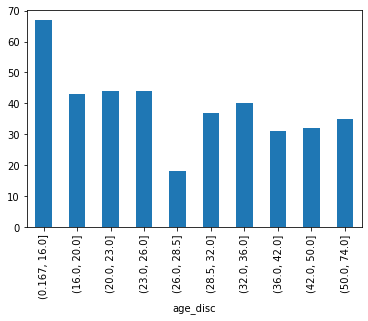

In [49]:
X_test.groupby('age_disc')['age'].count().plot.bar()

In [50]:
# same with sklearn

disc = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')

disc.fit(X_train[['age', 'fare']])

KBinsDiscretizer(encode='ordinal', n_bins=10, strategy='quantile')

In [51]:
disc.bin_edges_

array([array([ 0.1667, 16.    , 20.    , 23.    , 26.    , 28.5   , 32.    ,
       36.    , 42.    , 50.    , 74.    ]),
       array([  0.    ,   7.55  ,   7.7958,   8.05  ,  10.5   ,  14.4542,
        21.075 ,  26.55  ,  40.125 ,  79.025 , 512.3292])], dtype=object)

In [52]:
train_t = disc.transform(X_train[['age', 'fare']])
train_t = pd.DataFrame(train_t, columns=['age', 'fare'])
train_t.head()

,age,fare
0,0.0,5.0
1,0.0,6.0
2,5.0,4.0
3,9.0,1.0
4,2.0,1.0


In [53]:
test_t = disc.transform(X_test[['age', 'fare']])
test_t = pd.DataFrame(test_t, columns=['age', 'fare'])

Text(0, 0.5, 'num of obs per bin')

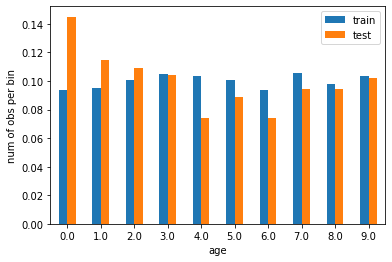

In [54]:
t1 = train_t.groupby(['age'])['age'].count() / len(train_t)
t2 = test_t.groupby(['age'])['age'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('num of obs per bin')

In [56]:
# Discretization plus Encoding

from sklearn.preprocessing import OrdinalEncoder

In [60]:
enc = OrdinalEncoder()

In [61]:
enc.fit(train_t, y_train)

train_t = enc.transform(train_t)
test_t = enc.transform(test_t)

In [63]:
enc.categories_

[array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])]

In [67]:
# train_t = pd.DataFrame([train_t])
# pd.concat([train_t, y_train], axis=1).groupby('age')['survived'].mean().plot()
# plt.ylabel('mean of survived')

In [68]:
# Discretization with Decsion Trees

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import cross_val_score 

In [69]:
data.head()

,survived,age,fare
0,1,29.0000,211.3375
1,1,0.9167,151.5500
2,0,2.0000,151.5500
3,0,30.0000,151.5500
4,0,25.0000,151.5500


In [70]:
X_train, X_test, y_train, y_test = train_test_split(
    data[['age', 'fare']],
    data['survived'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((916, 2), (393, 2))

In [71]:
def impute_na(data, variable):
    df = data.copy()
    df[variable+'_random'] = df[variable]
    random_sample = X_train[variable].dropna().sample(df[variable].isnull().sum(),
                                                     random_state=0)
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample
    
    return df[variable+'_random']

In [72]:
X_train['age'] = impute_na(data, 'age')
X_test['age'] = impute_na(data, 'age')

X_train['fare'] = impute_na(data, 'fare')
X_test['fare'] = impute_na(data, 'fare')

In [73]:
X_train.head()

,age,fare
501,13.0,19.5000
588,4.0,23.0000
402,30.0,13.8583
1193,21.0,7.7250
686,22.0,7.7250


In [74]:
tree = DecisionTreeClassifier(max_depth=3)

tree.fit(X_train['age'].to_frame(), y_train)

X_train['age_tree'] = tree.predict_proba(X_train['age'].to_frame())[:, 1]
X_train.head(10)

,age,fare,age_tree
501,13.0,19.5000,0.366059
588,4.0,23.0000,0.529412
402,30.0,13.8583,0.366059
1193,21.0,7.7250,0.366059
686,22.0,7.7250,0.366059
971,16.0,7.8792,0.366059
117,30.0,56.9292,0.366059
540,2.0,26.0000,0.529412
294,49.0,110.8833,0.450704
261,35.0,26.2875,0.366059


In [75]:
X_train['age_tree'].unique()

array([0.36605891, 0.52941176, 0.45070423, 0.        , 1.        ])

In [76]:
# age limit buckets generated by tree

pd.concat([X_train.groupby(['age_tree'])['age'].min(),
          X_train.groupby(['age_tree'])['age'].max()], axis=1)

,age,age
age_tree,,
0.000000,65.0000,74.0000
0.366059,9.0000,44.0000
0.450704,45.0000,64.0000
0.529412,0.7500,8.0000
1.000000,0.1667,0.1667


In [77]:
with open('tree_model.txt', 'w') as f:
    f = export_graphviz(tree, out_file=f)

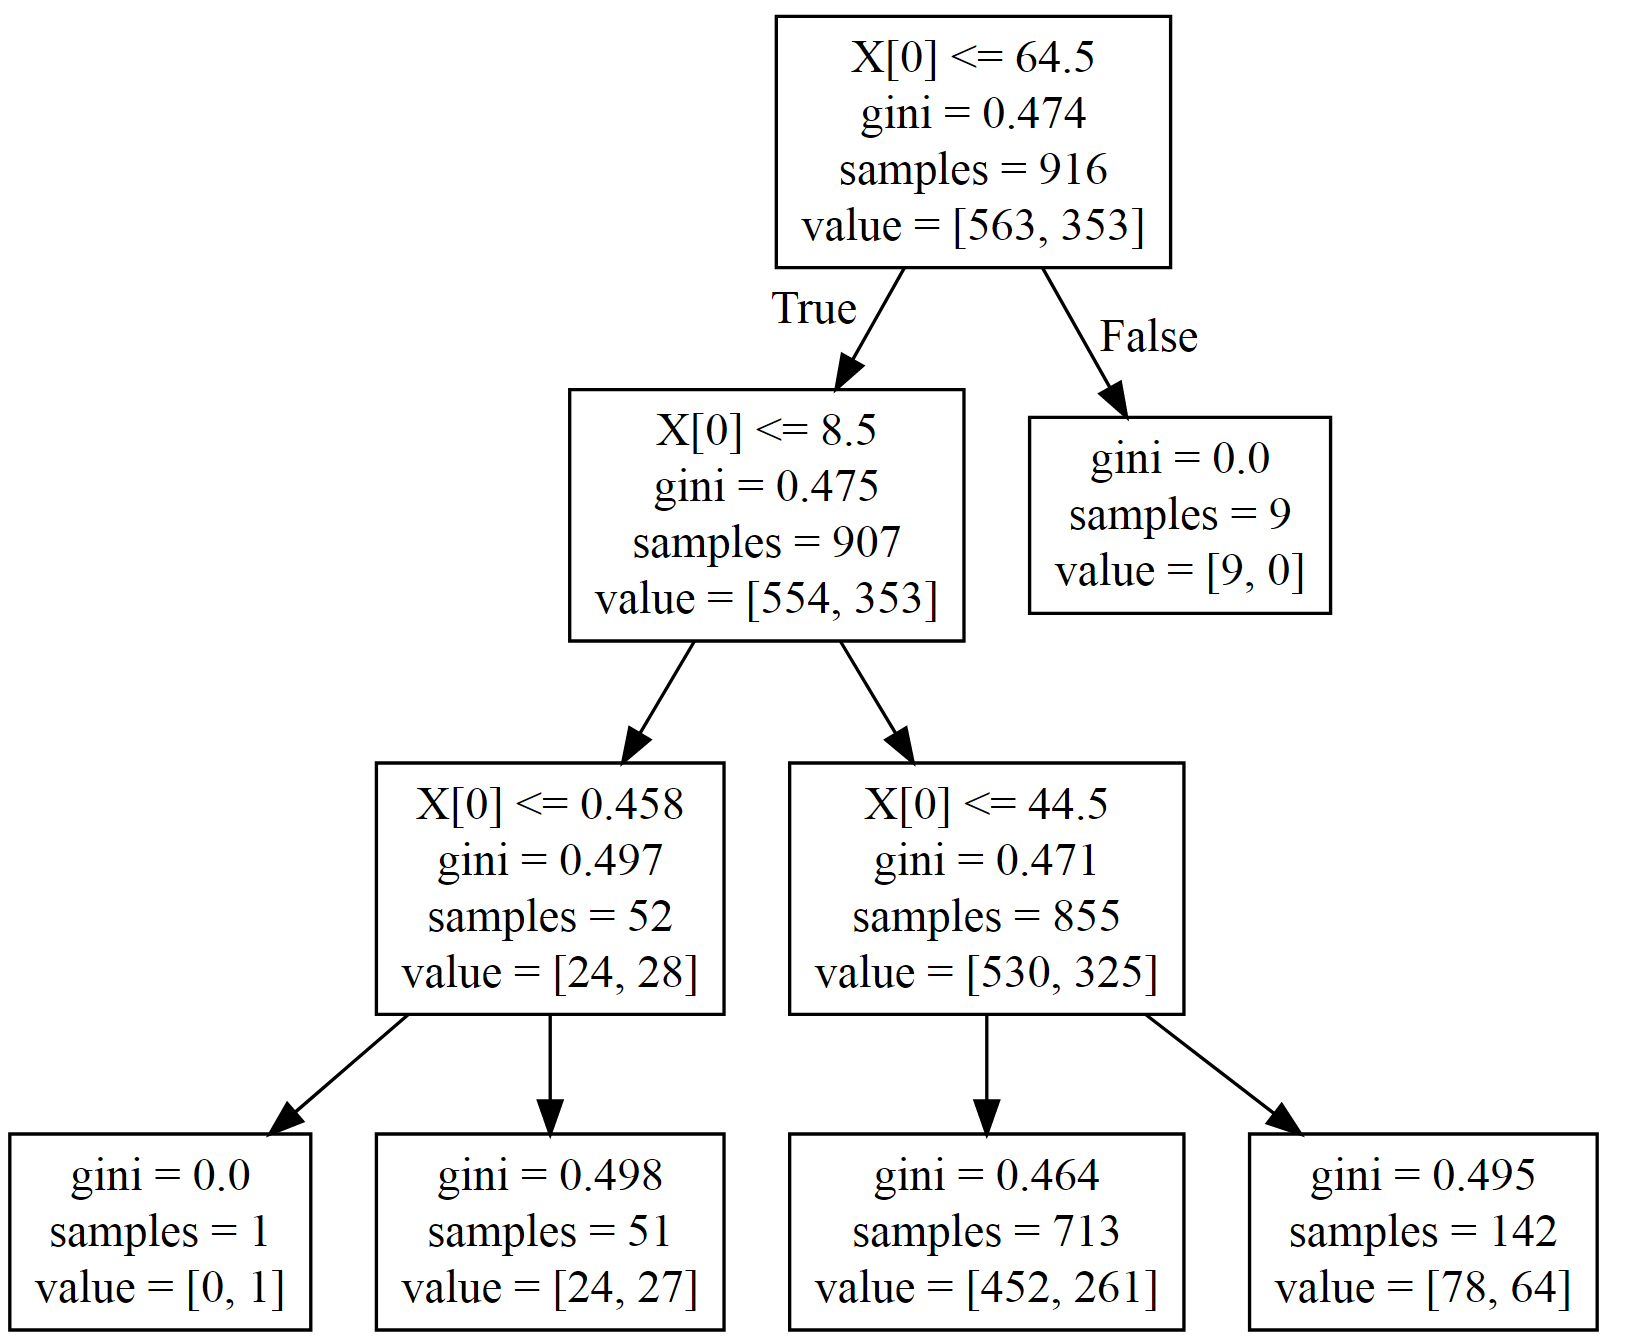

In [78]:
from IPython.display import Image
from IPython.core.display import HTML
PATH = 'tree_visualisation.png'
Image(filename=PATH, width=1000, height=1000)

In [79]:
# optimal decision tree

score_ls = []
score_std_ls = []

for tree_depth in [1, 2, 3, 4]:
    tree = DecisionTreeClassifier(max_depth=tree_depth)
    
    scores = cross_val_score(
        tree, X_train['age'].to_frame(), y_train, cv=3, scoring='roc_auc')
    
    score_ls.append(np.mean(scores))
    score_std_ls.append(np.std(scores))
    
temp = pd.concat([pd.Series([1, 2, 3, 4]), pd.Series(
    score_ls), pd.Series(score_std_ls)], axis=1)

temp.columns = ['depth', 'roc_auc_mean', 'roc_auc_std']
temp

,depth,roc_auc_mean,roc_auc_std
0,1,0.501610,0.010728
1,2,0.526407,0.018134
2,3,0.515982,0.029126
3,4,0.527269,0.024281


Text(0, 0.5, 'survived')

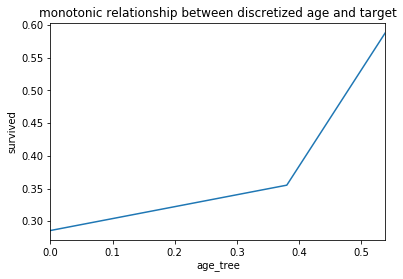

In [83]:
tree = DecisionTreeClassifier(max_depth=2)

tree.fit(X_train['age'].to_frame(), y_train)

X_train['age_tree'] = tree.predict_proba(X_train['age'].to_frame())[:, 1]
X_test['age_tree'] = tree.predict_proba(X_test['age'].to_frame())[:, 1]

X_test['age']

pd.concat([X_test, y_test], axis=1).groupby(['age_tree'])['survived'].mean().plot()
plt.title('monotonic relationship between discretized age and target')
plt.ylabel('survived')
